### Import Needed Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Enable full column display
pd.set_option('display.max_columns', None)

# Load dataset
churn_df = pd.read_csv("dataset/Part1-Telco-Customer-Churn.csv")

# View first 5 rows
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Convert Object columns to String
categorical_columns = churn_df.select_dtypes("object").columns
churn_df[categorical_columns] = churn_df[categorical_columns].astype("string")

### Display Churn Ratio

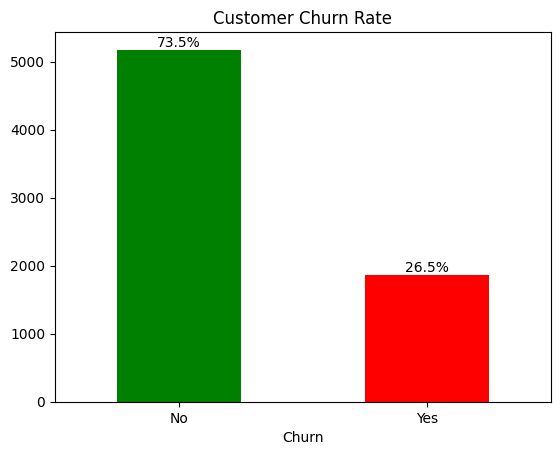

In [9]:
# Count records
record_count = churn_df.shape[0]

# Define plot
churn_df["Churn"].value_counts().plot(kind="bar",  color=["green", "red"], title="Customer Churn Rate")

# Get current axis
ax = plt.gca()

# Fix x-axis label rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Create percentage labels
labels = [
    f"{(bar.get_height() / record_count) * 100:.1f}%"
    for bar in ax.containers[0]
]

# Show data labels
ax.bar_label(ax.containers[0], labels=labels)
plt.show()

Observations:
- 26.5% of Customers have churned.
    
We have more data on Non Churners than Churners.
    
We will begin by inspecting the characteristics of all the churners, this would allow us get an idea as to what influences their decision to churn or the factors that like contribute to it.

### INSPECTING CHARACTERISTICS OF CHURNERS
We'll start by:
- Carrying out Univariate Analysis on suspected features.
- Carrying out Bivariate Analysis on suspected features.
- Carrying out Multivariate Analysis on suspected features.

In [10]:
print(f"{churn_df.shape[0]} Rows and {churn_df.shape[1]} Columns\n")

7043 Rows and 21 Columns



### Taking a look at Churn Rate in Categorical Columns

In [11]:
# Extract column names of categorical columns
categorical_columns = (churn_df.select_dtypes("string")
                                 .drop(columns=["customerID", "Churn"])
                                 .columns)
categorical_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

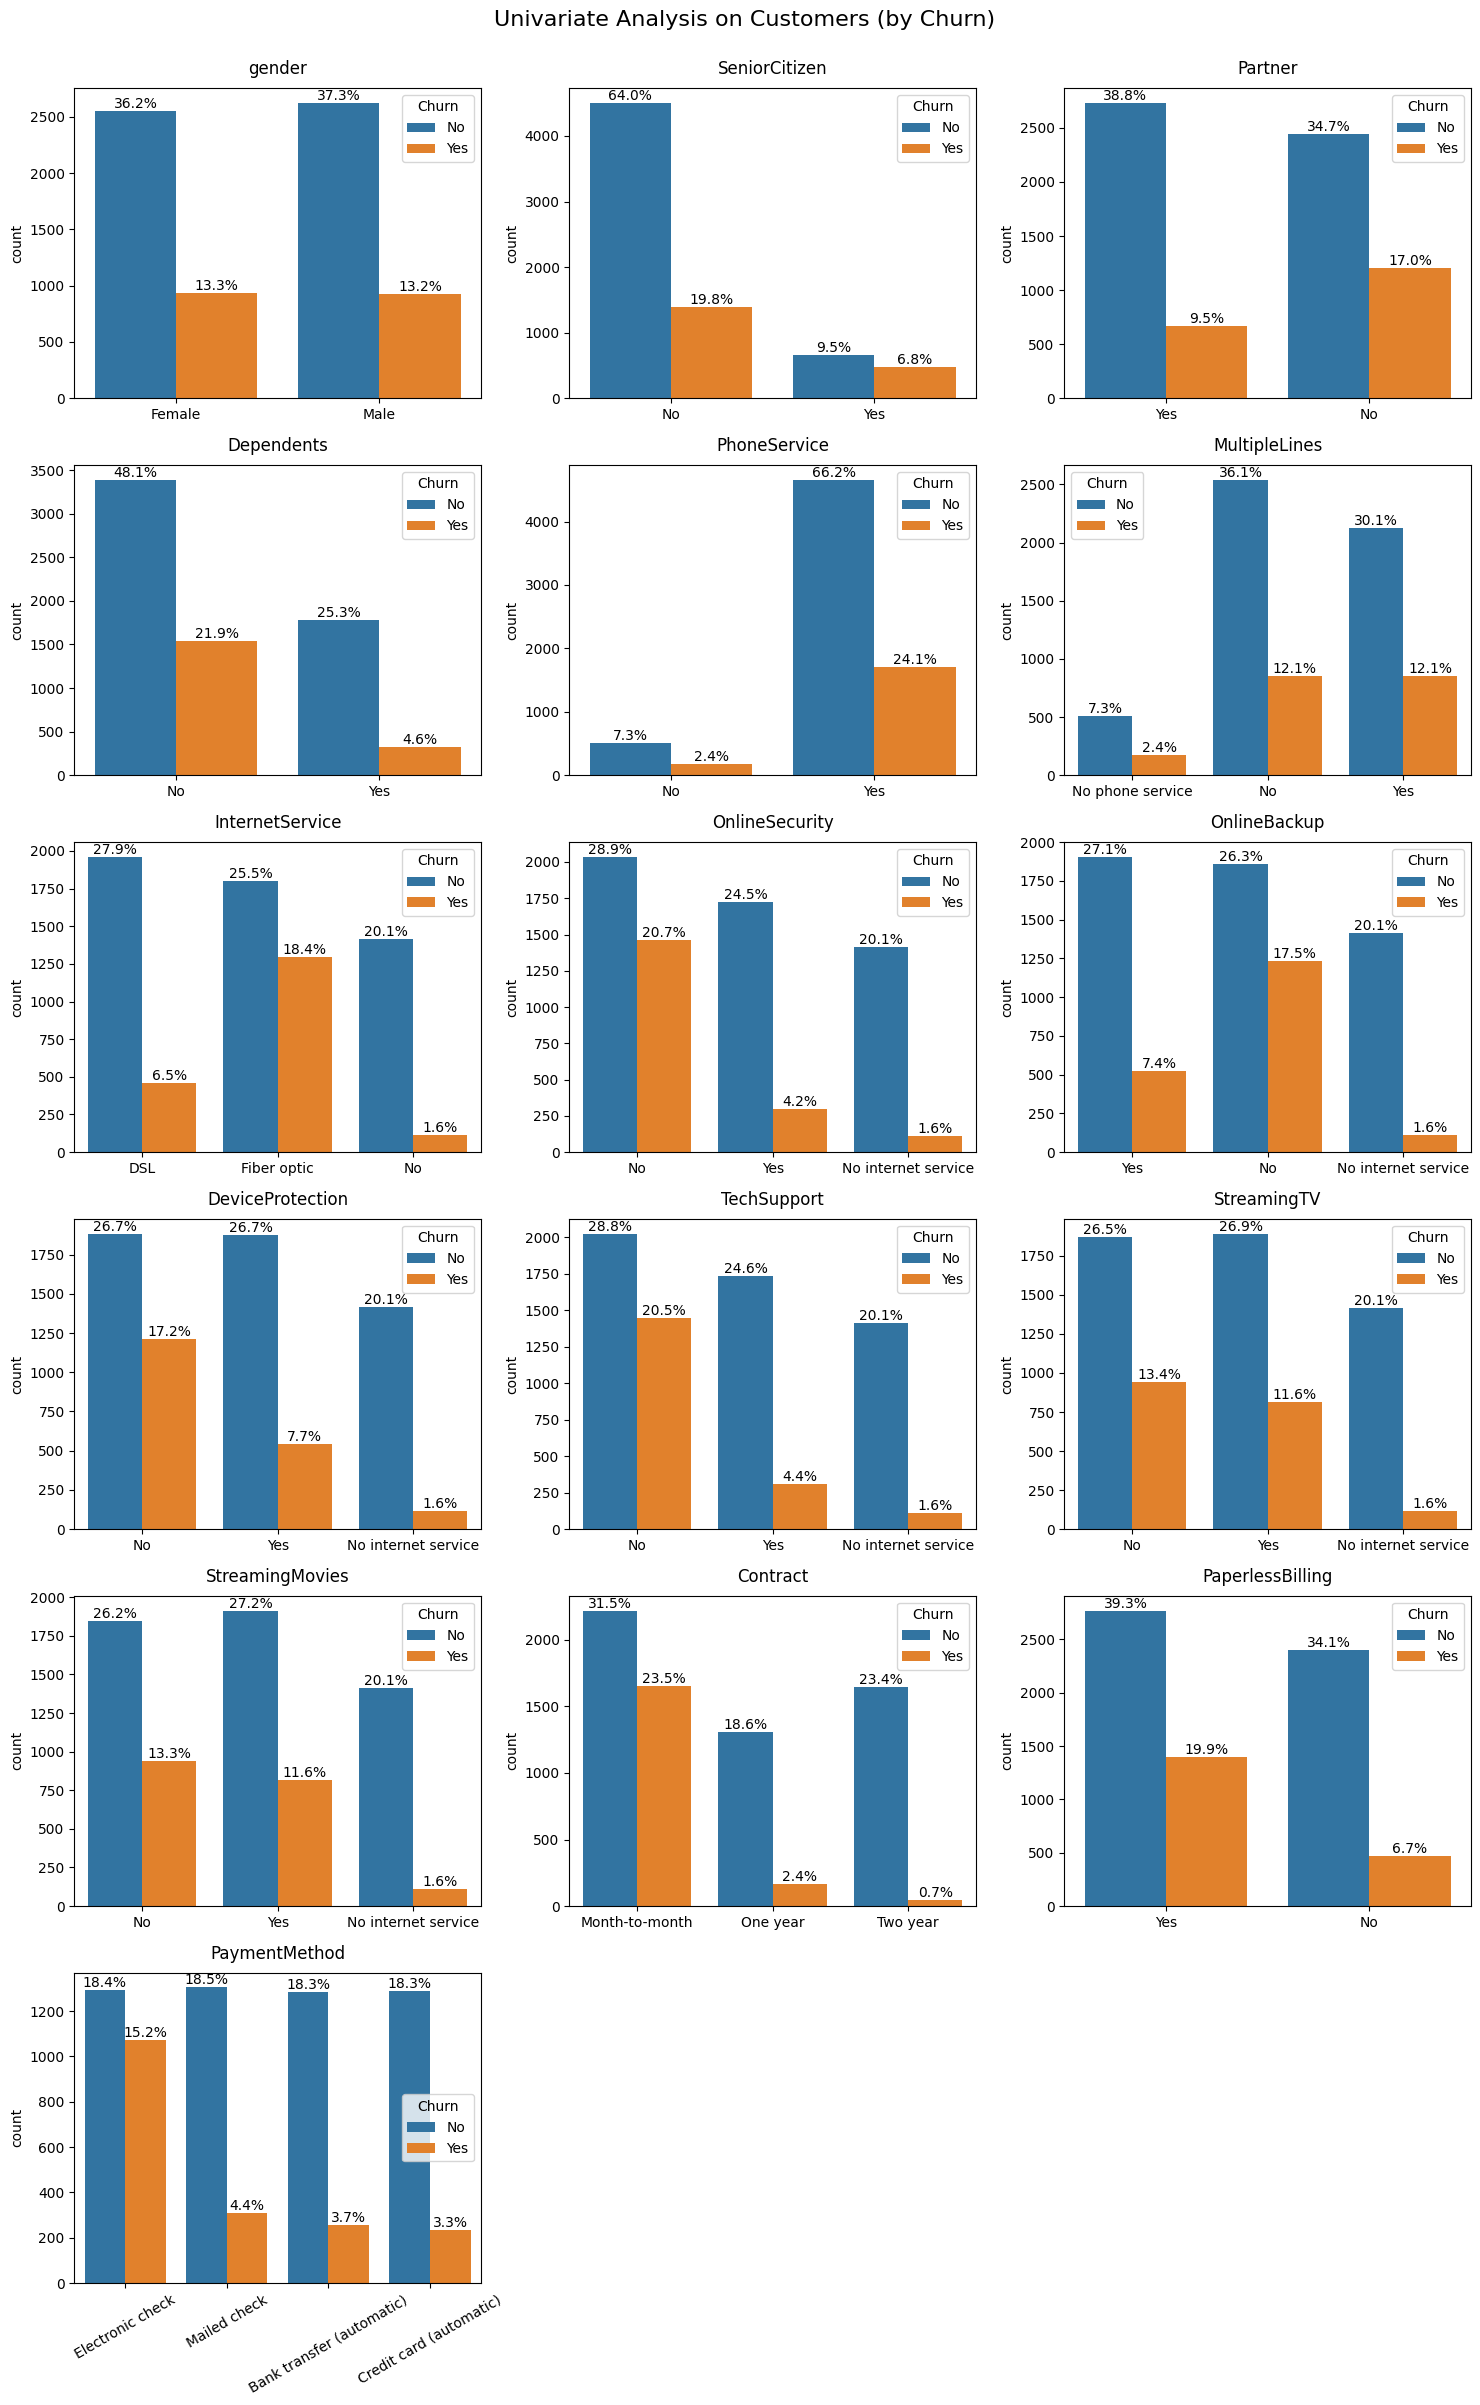

In [12]:
record_count = churn_df.shape[0]

n_cols = 3
n_rows = int(np.ceil(len(categorical_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for ax, col in zip(axes, categorical_columns):
    sns.countplot(data=churn_df, x=col, hue='Churn', ax=ax)
    
    ax.set_title(col, pad=10)
    ax.set_xlabel("")

    if col == "PaymentMethod":
        ax.tick_params(axis='x', rotation=30)
    else:
        ax.tick_params(axis='x', rotation=0)
    
    # Add percentage labels for all bars
    for container in ax.containers:
        labels = [
            f"{(bar.get_height() / record_count) * 100:.1f}%"
            for bar in container
        ]
        ax.bar_label(container, labels=labels)

# Remove empty subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Univariate Analysis on Customers (by Churn)", fontsize=16, y=1)
plt.savefig(
    "univariate_churn_subplots.png",
    dpi=300,
    bbox_inches="tight"
)
plt.tight_layout()
plt.show()

Observations:
- Gender, MultipleLines, StreamingTV and StreamingMovies are not clear determinants of Churn.
- Senior Citizens are more likely to Churn.
- Customers with no Partner or Dependents are more likely to Churn; Customers who have Dependents are less likely to Churn.
- Customers with Phone Service are more likely to churn.
- Customers with `Fiber Optic` Internet Service are more liely to Churn.
- Customers with no OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport are more likely to Churn.
- Customers on `Month-to-Month` Contract are more likely to Churn.
- Customers enjoying `PaperlessBilling` are more likely to Churn.
- Customers who use the `Electronic Check` Payment Method are more likely to Churn..

### Taking a look at Churn Rate in Numerical Columns

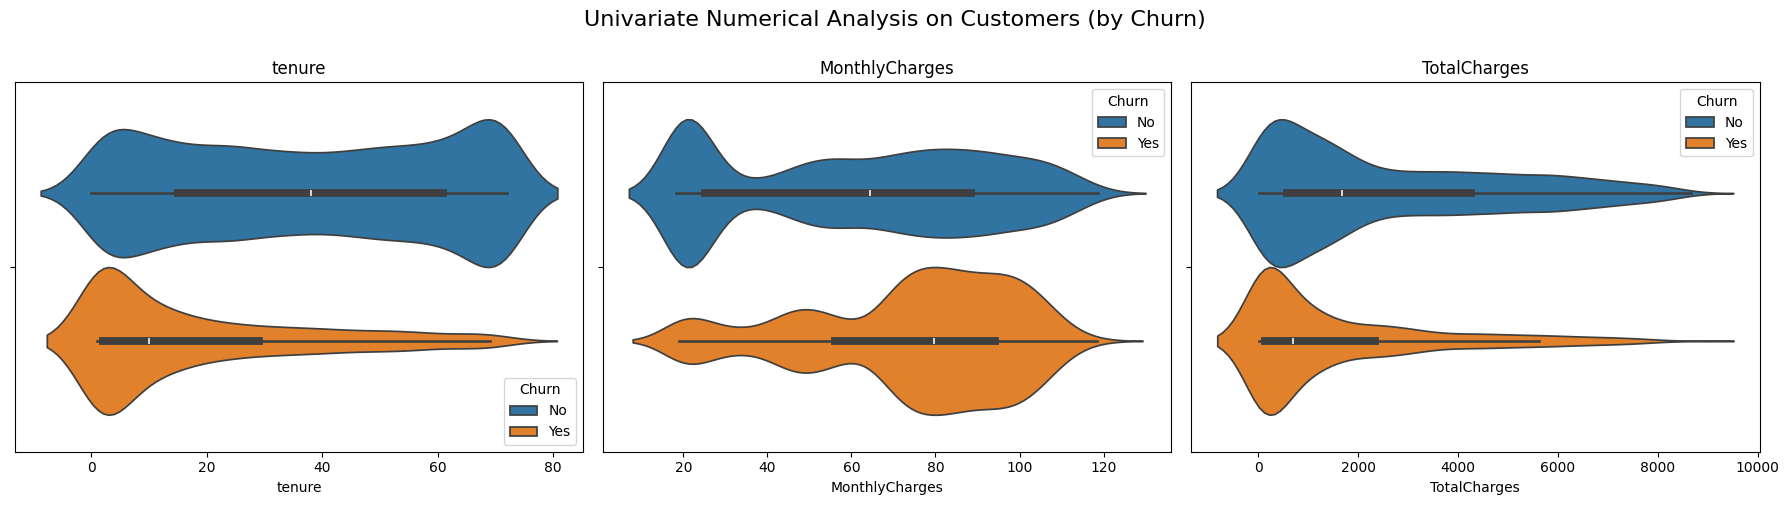

In [13]:
cols = ["tenure", "MonthlyCharges", "TotalCharges"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, cols):
    sns.violinplot(data=churn_df, x=col, hue="Churn", ax=ax)
    ax.set_title(col)

plt.suptitle("Univariate Numerical Analysis on Customers (by Churn)", fontsize=16, y=1)
plt.tight_layout()
plt.show()


Oservations:
- About 50% of churned Customers have a tenure `less than 10 months`. This reveals that Churn is heavily concentrated in the first year of the relationship. If a customer is going to leave, they usually do it quickly.
- Binning the Tenures into Segments of 12 Months each should be able to reveal more insights.
- There is a clear price sensitivity in Monthly Charges. Churn is heavily skewed toward the upper end of the pricing spectrum (`$70 – $100`), while the most stable customer base is anchored in the entry-level price range (`$20`). 
- The average person who leaves is paying roughly `$15` more per month than the average person who stays.
- Most people who churn leave before they spend significant money(TotalCharges). It perfectly mirrors the Tenure plot too.
- About 50% of the people who left the company spent less than $500 in total before quitting.

### Inspect Relationships between Numerical columns
- View correlation between Tenure, MonthlyCharges and TotalCharges

In [64]:
churn_df.groupby("Churn")[["tenure", "MonthlyCharges", "TotalCharges"]].corr().T

Churn                 No                                   Yes                 \
                  tenure MonthlyCharges TotalCharges    tenure MonthlyCharges   
tenure          1.000000       0.330892     0.793718  1.000000       0.401286   
MonthlyCharges  0.330892       1.000000     0.756896  0.401286       1.000000   
TotalCharges    0.793718       0.756896     1.000000  0.954017       0.545772   

Churn                        
               TotalCharges  
tenure             0.954017  
MonthlyCharges     0.545772  
TotalCharges       1.000000

Observations:
- For churned customers, `TotalCharges` is almost entirely determined by `tenure`; it has a very strong correlation.
- For non-churners, `MonthlyCharges` strongly affects `TotalCharges`; Churners don’t even stay long enough for high monthly fees to accumulate.

### Inspect Spread in Numerical columns.

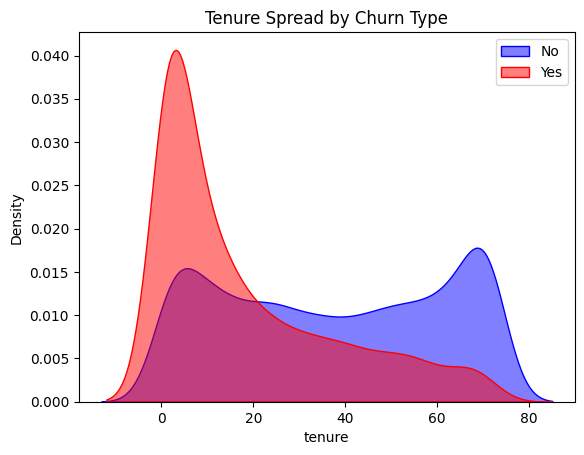

--------------------------------------------------------------------------------


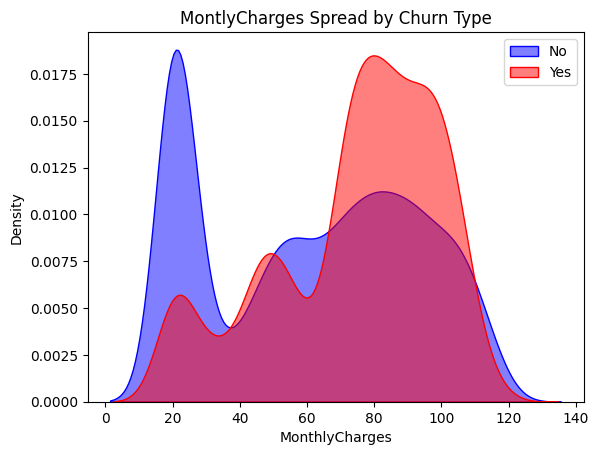

--------------------------------------------------------------------------------


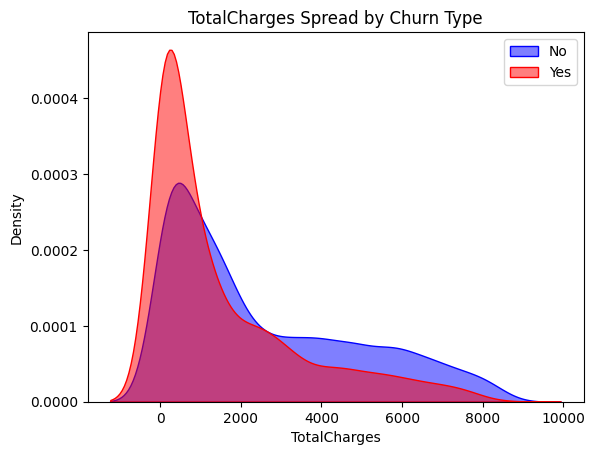

In [91]:
sns.kdeplot(data=churn_df[churn_df["Churn"] == "No"], x="tenure", fill=True, alpha=0.5, color="Blue", label="No")
sns.kdeplot(data=churn_df[churn_df["Churn"] == "Yes"], x="tenure", fill=True, alpha=0.5, color="Red", label="Yes")
plt.title("Tenure Spread by Churn Type")
plt.legend()
plt.show()

print("-"*80)

sns.kdeplot(data=churn_df[churn_df["Churn"] == "No"], x="MonthlyCharges", fill=True, alpha=0.5, color="Blue", label="No")
sns.kdeplot(data=churn_df[churn_df["Churn"] == "Yes"], x="MonthlyCharges", fill=True, alpha=0.5, color="Red", label="Yes")
plt.title("MontlyCharges Spread by Churn Type")
plt.legend()
plt.show()

print("-"*80)

sns.kdeplot(data=churn_df[churn_df["Churn"] == "No"], x="TotalCharges", fill=True, alpha=0.5, color="Blue", label="No")
sns.kdeplot(data=churn_df[churn_df["Churn"] == "Yes"], x="TotalCharges", fill=True, alpha=0.5, color="Red", label="Yes")
plt.title("TotalCharges Spread by Churn Type")
plt.legend()
plt.show()

Observations:
- Customers with short `tenure` are substantially more likely to churn.
- Churned customers tend to have higher `MonthlyCharges` compared to non-churned customers, indicating a pricing-related association with churn.
- Churned customers generally exhibit lower `TotalCharges`, primarily as a consequence of shorter customer lifetimes rather than lower monthly pricing.

### TOTAL DERIVED INSIGHT:
---
**<u>Customer Churn Overview</u>**
- Gender does **not** strongly influence churn.
- Senior citizens, customers without partners or dependents, and those on certain services (Phone Service, Fiber Optic Internet) are more likely to churn.
- Lack of protections or support (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport) is associated with higher churn.
- Customers on **month-to-month contracts**, with **paperless billing**, and using **electronic check payments** are more prone to churn.
- Churn is heavily concentrated in the **first year of the relationship**. About 50% of churned customers leave within 10 months.
- Short tenure is the **dominant predictor** of churn.
- Churned customers tend to have **higher MonthlyCharges** (roughly `$15` more per month on average).
- TotalCharges for churned customers are low, reflecting **short tenure rather than low monthly fees**.
- Churn is particularly prevalent among customers in the **upper pricing tier (`$70–$100`/month)**, while low-cost plans (`$20`/month) retain customers more consistently.
- **Early tenure and pricing** are key risk factors.
- Service bundles, contract type, and billing method are strong behavioral indicators.
- Targeting high-risk groups (short-tenure, high MonthlyCharges and month-to-month contracts) could help reduce churn.

In [47]:
churn_df.to_csv("dataset/Part2-Telco-Customer-Churn.csv", index=False)